In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
dataset = pd.read_csv("sample_data/Dataset.csv")
dataset

,Word,Text,URL
0,пo-/iн/`aк+ш+oму,Все тут [на фронті] було #по-інакшому#. Думки ...,http://ukrlit.org/faily/avtor/dovzhenko_oleksa...
1,/iн/`aк+ш+e,"Суддя бачив, що бурлацьке діло розв'язується т...",http://bukvoid.com.ua/library/ivan_nechuy-levi...
2,/iн/`aк+ш+e,"Коли Іванові минуло сім літ, він вже дивився н...",https://www.livelib.ru/quote/389298-tini-zabut...
3,зa/вoд/ij+`aк*a,Він - #заводіяка# і призвідця всіляких витівок...,https://naurok.com.ua/uroki-ukra-nsko-literatu...
4,/пись/м+`aк,"Сопілку здумав нарядить.\nЗробив, і як прийняв...",https://archive.org/stream/burleskXIX/BurleskX...
5,пo/туp/н+`aк,"Торік восени рушив наш батько через море, і пі...",https://www.myslenedrevo.com.ua/uk/Lit/T/Tulub...
6,/пapуб/ч+`aк,Золотницький сидить на лаві за столом.. Ясь ст...,http://library.kr.ua/elib/kariy/khazayin.html
7,/дв/oj+`aк+o,"сторонні люди, розбираючись в тому, що відбува...",https://uk.wikisource.org/wiki/%D0%93%D1%96%D1...
8,/бiд/oл+`aк*a,“Я не #бідолаха#”: білоруски записали відео-ві...,https://povaha.org.ua/ya-ne-bidolaha-bilorusky...
9,/сoл/oн+ч+`aк,"Крім того, на випаровування використовується ...",http://cgo-sreznevskyi.kyiv.ua/data/bis3/zemle...


In [47]:
def clean_word(word): 
  result = word.replace(".", "")
  result = result.replace(",", "")
  result = result.replace("/n", "")
  result = result.replace("\n", "")
  result = result.replace("-","")
  result = result.replace("[","")
  result = result.replace("]","")
  result = result.replace("«","")
  result = result.replace("»","")
  result = result.replace("{","")
  result = result.replace("}","")
  result = result.replace("—","")
  result = result.replace("(","")
  result = result.replace(")","")
  return result.lower()


In [48]:
def get_freq_dict(text):
  freq_dict = {}
  for word in text.split(" "):
    current = clean_word(word)
    if(current not in freq_dict.keys()):
      freq_dict[current] = 1
    else:
      freq_dict[current] += 1
  del(freq_dict[""])
  return freq_dict


In [49]:
def get_all_text(dataset):
  all_text = ""
  
  for text in dataset["Text"]:
    all_text += text.replace("#", "") + " "

  return all_text

In [50]:
def get_word_count(text):
  count = len(text.split(' '))
  return count

In [51]:
def get_top30(freq_df):
  top30_df = freq_df.nlargest(30, 'count')
  return top30_df

In [73]:
spam_text = get_all_text(dataset)
spam_freq_dict = get_freq_dict(spam_text)
spam_df = pd.DataFrame(spam_freq_dict.items(), columns=['word', 'count'])
spam_df.to_csv("sample_data/spam.csv", index = False)
spam_df = pd.read_csv("sample_data/spam.csv")
spam_df.head(30)

,word,count
0,все,3
1,тут,1
2,на,15
3,фронті,1
4,було,1
5,поінакшому,2
6,думки,1
7,проносились,1
8,одна,1
9,одної,1


In [53]:
get_word_count(spam_text)

749

In [54]:
top30_spam_df = get_top30(spam_df)

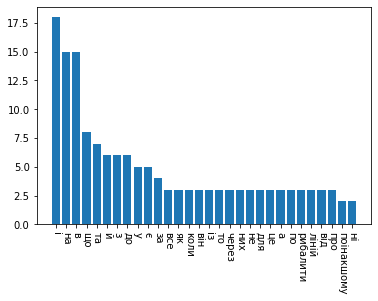

In [55]:
plt.bar(top30_spam_df["word"], top30_spam_df["count"])
plt.xticks(rotation=270)
plt.show()

In [72]:
related_text = open("sample_data/related_text.txt","r",encoding="utf-8").read()
related_freq_dict = get_freq_dict(related_text)
related_df = pd.DataFrame(related_freq_dict.items(), columns=['word', 'count'])
related_df.to_csv("sample_data/related.csv", index = False)
related_df = pd.read_csv("sample_data/related.csv")
related_df.head(30)

,word,count
0,1,2
1,до,14
2,персоналу,1
3,державної,8
4,кримінальновиконавчої,13
5,служби,18
6,україни,23
7,належать,1
8,особи,2
9,рядового,8


In [57]:
get_word_count(related_text)

788

In [58]:
top30_related_df = get_top30(related_df)

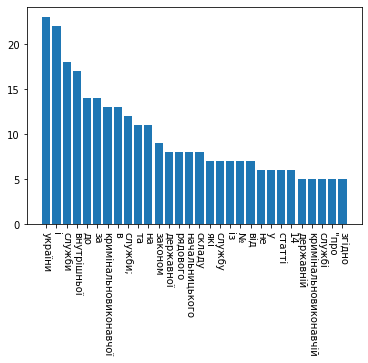

In [59]:
plt.bar(top30_related_df["word"], top30_related_df["count"])
plt.xticks(rotation=270)
plt.show()

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [61]:
dataset["Text"] = dataset["Text"].apply(lambda i: i.replace("#",""))
learning_materials_spam = pd.DataFrame(columns=["Text","Class"],data=dataset["Text"])
learning_materials_spam["Class"] = "unrelated"
learning_materials_spam.dropna(inplace=True)

In [62]:
learning_materials_related = pd.DataFrame(columns=["Text"], data=[related_text])
learning_materials_related["Class"] = "related"

In [63]:
learning_materials = learning_materials_spam.append(learning_materials_related)
learning_materials.reset_index(drop=True,inplace=True)
learning_materials

,Text,Class
0,Все тут [на фронті] було по-інакшому. Думки пр...,unrelated
1,"Суддя бачив, що бурлацьке діло розв'язується т...",unrelated
2,"Коли Іванові минуло сім літ, він вже дивився н...",unrelated
3,Він - заводіяка і призвідця всіляких витівок т...,unrelated
4,"Сопілку здумав нарядить.\nЗробив, і як прийняв...",unrelated
5,"Торік восени рушив наш батько через море, і пі...",unrelated
6,Золотницький сидить на лаві за столом.. Ясь ст...,unrelated
7,"сторонні люди, розбираючись в тому, що відбува...",unrelated
8,“Я не бідолаха”: білоруски записали відео-відп...,unrelated
9,"Крім того, на випаровування використовується ...",unrelated


In [64]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(learning_materials["Text"])
model = MultinomialNB()

In [65]:
model.fit(vectorized,learning_materials["Class"].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
def predict(text):
  vector = vectorizer.transform([text])
  related_prob,unrelated_prob = model.predict_proba(vector)[0]
  print("\n Ймовірності віднесення цього тексту до \n Класу #1(спаму) - ", unrelated_prob, "\n Класу #2(пов'язаного тексту) - ", related_prob)

In [68]:
text = input()
predict(text)

У разі виникнення конфлікту інтересів під час виконання службових повноважень особа рядового чи начальницького складу Державної кримінально-виконавчої служби України зобов’язана негайно доповісти про це своєму безпосередньому керівникові. Безпосередній керівник зобов’язаний вжити всіх необхідних заходів, спрямованих на запобігання конфлікту інтересів, шляхом доручення виконання відповідного службового завдання іншій посадовій особі, особистого виконання службового завдання чи в інший спосіб, передбачений законодавством

 Ймовірності віднесення цього тексту до 
 Класу #1(спаму) -  3.748910349544063e-12 
 Класу #2(пов'язаного тексту) -  0.9999999999962483


In [ ]:
text = input()
predict(text)

Розподілена система — це набір незалежних комп'ютерів, що представляється їх користувачам єдиною об'єднаною системою.  У цьому визначенні обмовляються два моменти. Перший відноситься до апаратури: всі машини автономні. Другий стосується програмного забезпечення: користувачі думають, що мають справу з єдиною системою. Важливо обидва моменти. Можливо, замість того щоб розглядати визначення, розумніше буде зосередитися на важливих характеристиках розподілених систем. Перша з таких характеристик полягає в тому, що від користувачів приховані відмінності між комп'ютерами і способи зв'язку між ними. Те ж саме відноситься і до зовнішньої організації розподілених систем. Іншою важливою характеристикою розподілених систем є спосіб, за допомогою якого користувачі і додатки одноманітно працюють в розподілених системах, незалежно від того, де і коли відбувається їх взаємодія

 Ймовірності віднесення цього тексту до 
 Класу #1(спаму) -  0.9966969633302696 
 Класу #2(пов'язаного тексту) -  0.00330303

In [ ]:
text = input()
predict(text)

Обмеження Державній кримінально. Особи рядового і начальницького складу. У разі, яка перебуває в підпорядкуванні, підлягає звільненню із служби

 Ймовірності віднесення цього тексту до 
 Класу #1(спаму) -  1.1425638651495574e-07 
 Класу #2(пов'язаного тексту) -  0.999999885743612


In [ ]:
text = input()
predict(text)

Організація особами рядового і начальницького складу та працівниками

 Ймовірності віднесення цього тексту до 
 Класу #1(спаму) -  0.013945510976633744 
 Класу #2(пов'язаного тексту) -  0.9860544890233656
